# Image Classification with pre-trained VGG16 Model

In this notebook we will explain step by step how to use a pre-trained model, VGG16, to perform Image Classification on new images.   
Image classification is the task of assigning a label to an image from a predefined set of categories. Given an input image, we return a label that categorizes the image.   
More in detail, in this notebook we will predict the 3 most likely labels with associated probabilities for the object in the image of interest.   
In order to perform our Image Classification task, we will use VGG16 model, a convolution neural net (CNN) architecture which is considered to be one of the best vision model architecture.

## Importing Libraries

First step, we need to import from keras and Matplotlib libraries.

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

## Loading Model and Pre-trained Weights

Let's load VGG16  model (16 layers that have weights) and its pre-trained weights.   
The weights are pre-trained on ImageNet, which is a dataset of over 14 million high-resolution images belonging to 1000 classes.   

When we load the model for the first time, Keras will also download the weight files.  Next time instead, the weights will be loaded locally.

In [5]:
## Loading VGG16 model

model = VGG16(
               include_top=True,        # we include the output layers (3 fully-connected layers) of the model
               weights="imagenet"       # loading weights pre-trained on ImageNet dataset
             )

## VGG16 Model Architecture

![title](VGG16_2.png)   
![title](VGG16.png)

The input to the network is of fixed size 224 x 224 RGB image. That is, the model expects an input image with the size 224 x 224 pixels with 3 channels (color image).   
The image is passed through a stack of convolutional layers and max-pooling layers.   
At the end, the stack of convolutional layers is followed by 3 Fully Connected layers (including a softmax for output).   
The network performs 1000-way classification. That is, given an image of an object, it tells us which one of 1,000 specific objects the image shows.

## Image Classification

Given an image, we perform Image Classification task.   

More in detail, for the image of interest, we:
- show the image,
- load the image, setting a specific size (224x224, that is the one required by our network),
- convert the image to a numpy array,
- reshape the image by adding an extra dimension, because the network expects one or more images as input (that is, the input array must be 4-dimensional: samples, height, width and channels),
- preprocess the image in order to pass it as input to the network,
- predict the probability for the image to belong to each of the 1000 object categories,
- decode network predictions, 
- show the 3 most likely object labels with associated probabilities.

In [13]:
dpi = plt.rcParams['figure.dpi']                # let's have a look at the default dpi in jupyter notebook


def label_predictor(image):
    
    '''
        Given an input image, shows the image and outputs the 3 most likely object labels for the image.

        Parameters:
            image: the image of interest.

        Returns:
            top 3 predicted labels for the object in the image.   
    '''
    
    
    ## SHOW THE IMAGE
    #################
    img_plot = load_img(image)                              # loading image
    
    img_width = img_plot.width                              # image width
    img_height = img_plot.height                            # image height
    
    plt.figure(figsize = (img_width/dpi, img_height/dpi))   # figsize
    plt.imshow(img_plot)                                    # show the image
    plt.show()
    
    
    
    ## LOAD THE IMAGE AND PREPROCESSING
    ###################################
    img = load_img(image, target_size=(224,224))      # load the image and resize it (224×224 pixels)

    img = img_to_array(img)                           # convert the pixels to a numpy array

    height, width, channels = img.shape               # retrieve height, width and channels of the image

    img = img.reshape((1, height, width, channels))   # reshape the image to add an extra dimension
                                                      # (extra dimension is number of samples)

    img = preprocess_input(img)                       # preprocess the image to use as input into the network
    
    
    ## LABEL PREDICTION
    ###################
    prediction = model.predict(img)                          # model predictions
    
    top_labels = decode_predictions(prediction, top = 3)     # decode predictions and take the top 3 predicted labels
    
    print("\nTOP 3 PREDICTED LABELS\n")
    for label in top_labels:             # for each of predicted labels, print label and associated probability...
        for x in range(3):
            print("LABEL %s: %s, prob. %.2f%%" % (x+1,label[x][1], label[x][2]*100))


## Final Results

Let's have a look at the output of Image Classification task. Here, we have some examples...

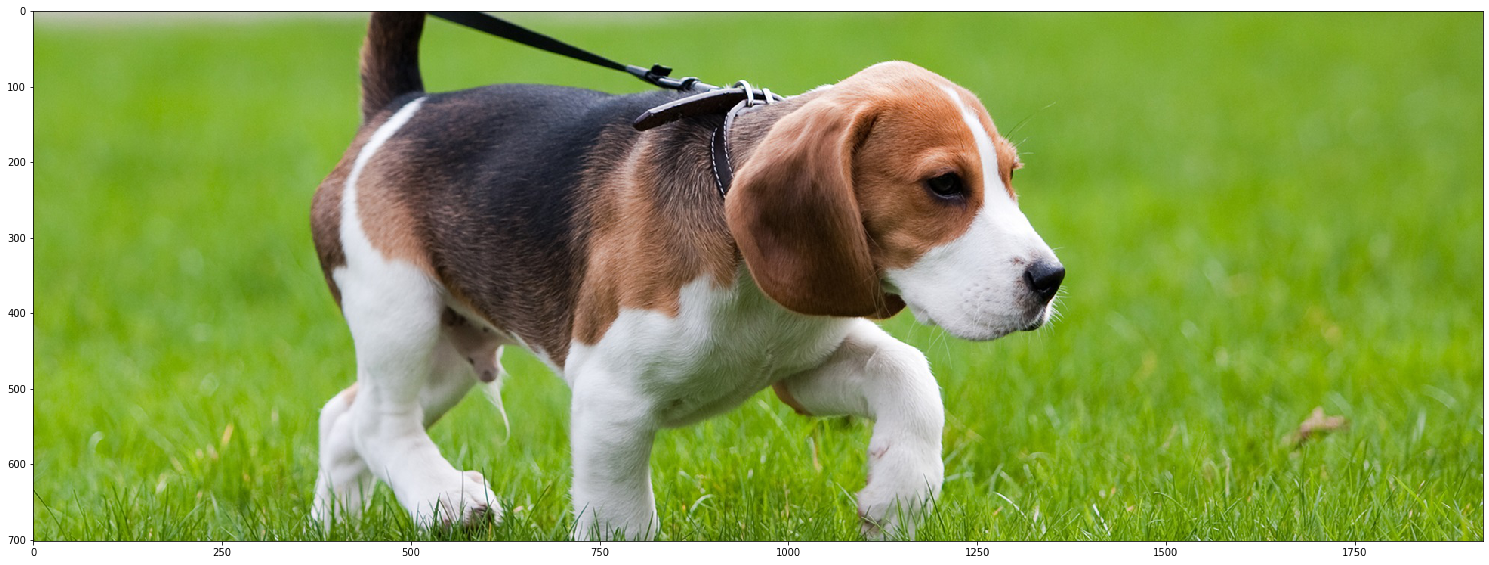


TOP 3 PREDICTED LABELS

LABEL 1: Walker_hound, prob. 71.92%
LABEL 2: English_foxhound, prob. 12.37%
LABEL 3: beagle, prob. 9.57%


In [14]:
#############
## IMAGE 1 ##
#############

file_path= "image_class_1.jpg"              # image path

label_predictor(file_path)                  # image classification

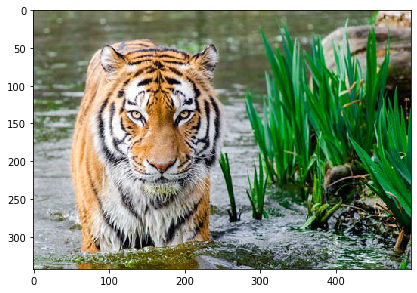


TOP 3 PREDICTED LABELS

LABEL 1: tiger, prob. 82.86%
LABEL 2: tiger_cat, prob. 17.13%
LABEL 3: lynx, prob. 0.00%


In [15]:
#############
## IMAGE 2 ##
#############

file_path= "image_class_2.jpg"              # image path

label_predictor(file_path)                  # image classification

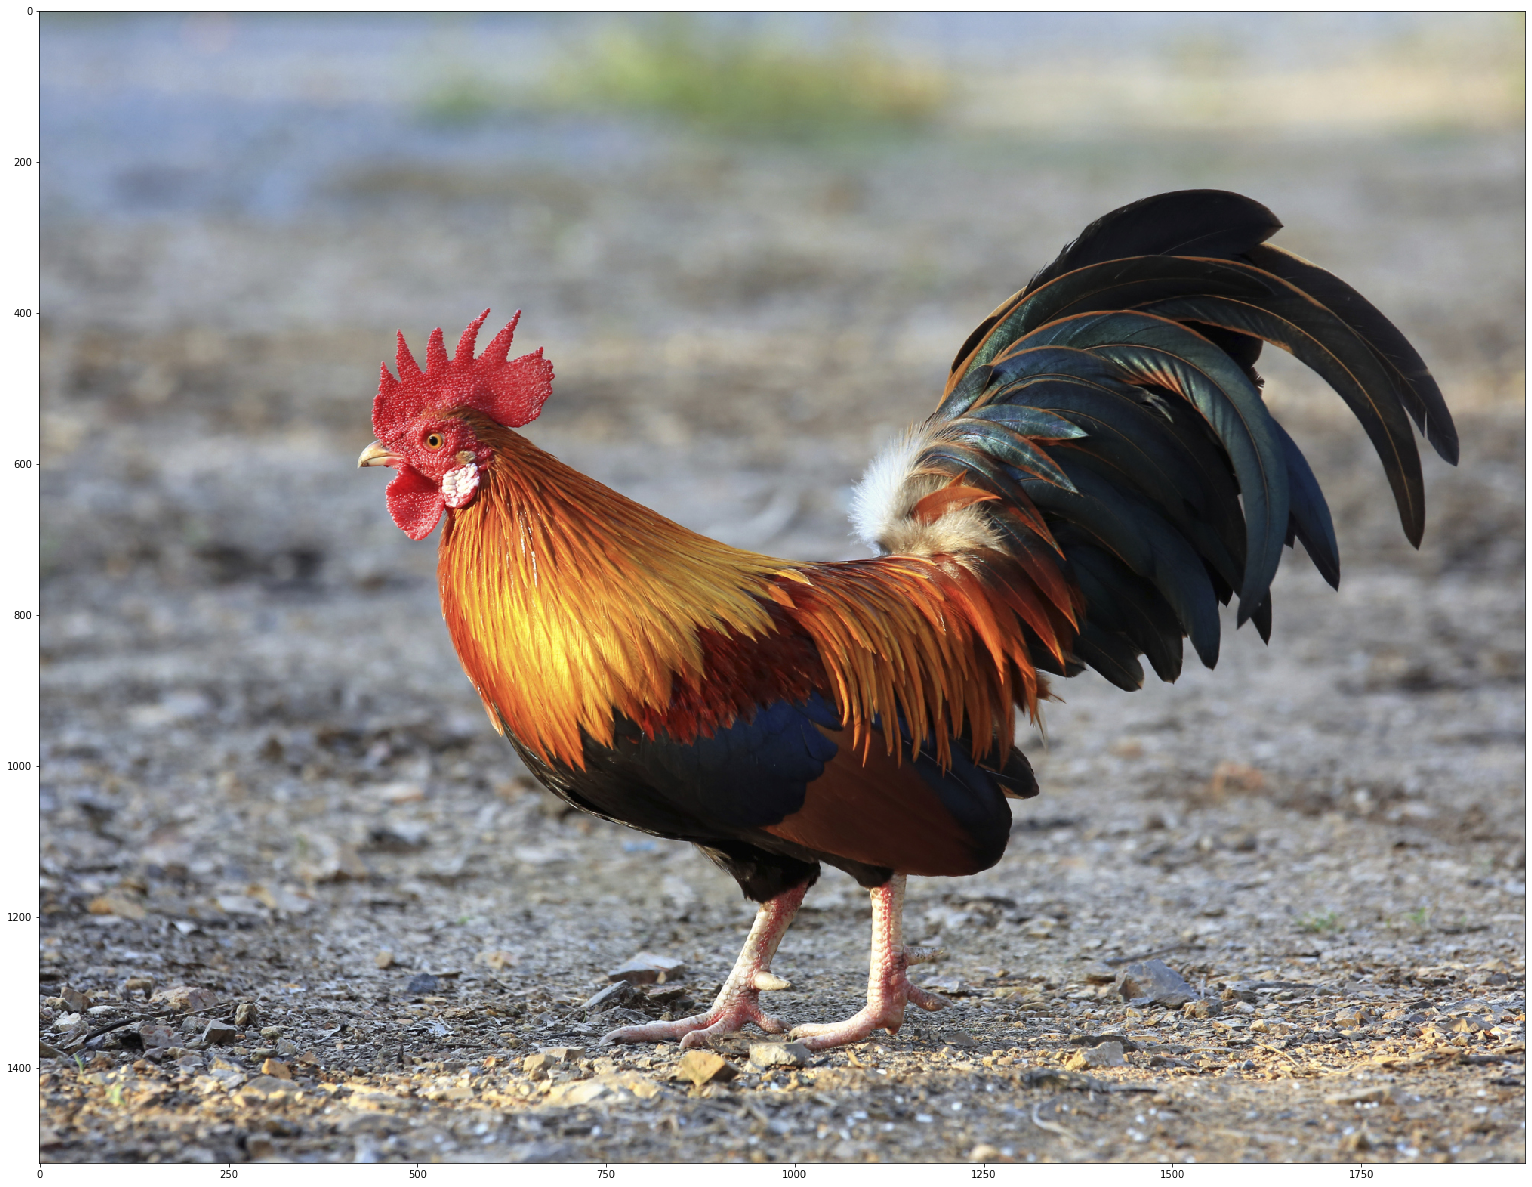


TOP 3 PREDICTED LABELS

LABEL 1: cock, prob. 92.38%
LABEL 2: hen, prob. 5.56%
LABEL 3: partridge, prob. 1.90%


In [16]:
#############
## IMAGE 3 ##
#############

file_path= "image_class_3.jpg"              # image path

label_predictor(file_path)                  # image classification

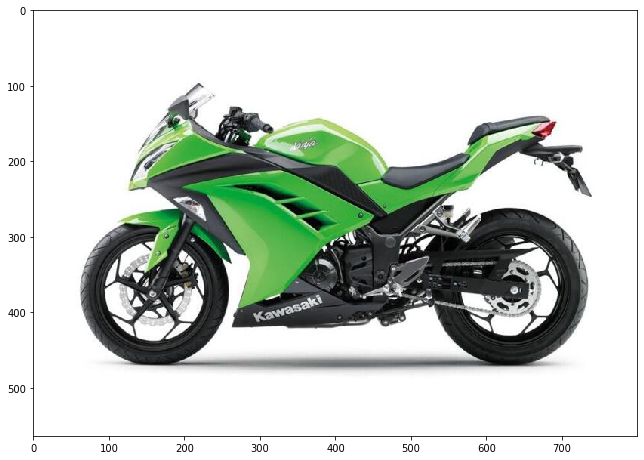


TOP 3 PREDICTED LABELS

LABEL 1: motor_scooter, prob. 50.63%
LABEL 2: moped, prob. 29.02%
LABEL 3: crash_helmet, prob. 12.89%


In [52]:
#############
## IMAGE 4 ##
#############

file_path= "image_class_4.jpg"              # image path

label_predictor(file_path)                  # image classification

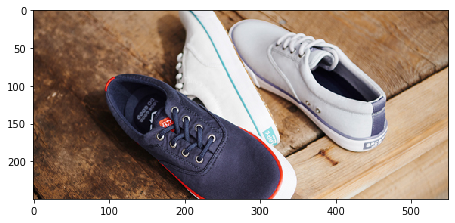


TOP 3 PREDICTED LABELS

LABEL 1: running_shoe, prob. 46.00%
LABEL 2: sandal, prob. 27.11%
LABEL 3: clog, prob. 9.57%


In [17]:
#############
## IMAGE 5 ##
#############

file_path= "image_class_5.jpg"              # image path

label_predictor(file_path)                  # image classification

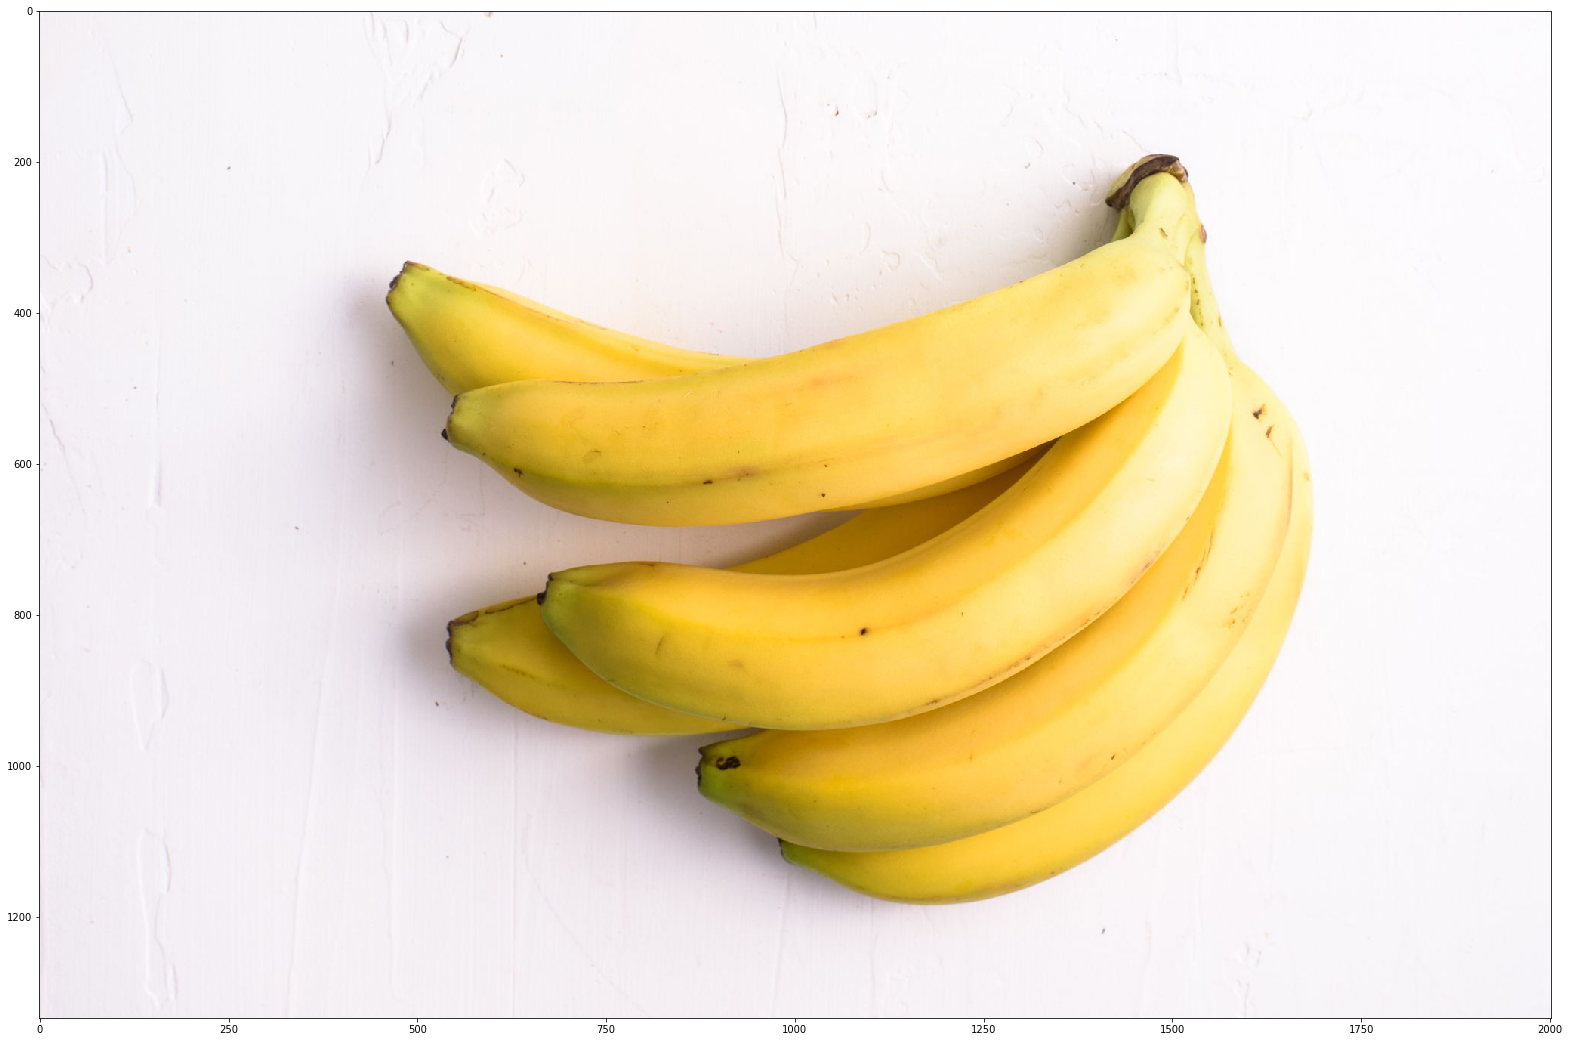


TOP 3 PREDICTED LABELS

LABEL 1: banana, prob. 99.91%
LABEL 2: acorn_squash, prob. 0.02%
LABEL 3: orange, prob. 0.01%


In [21]:
#############
## IMAGE 6 ##
#############

file_path= "image_class_6.jpg"              # image path

label_predictor(file_path)                  # image classification

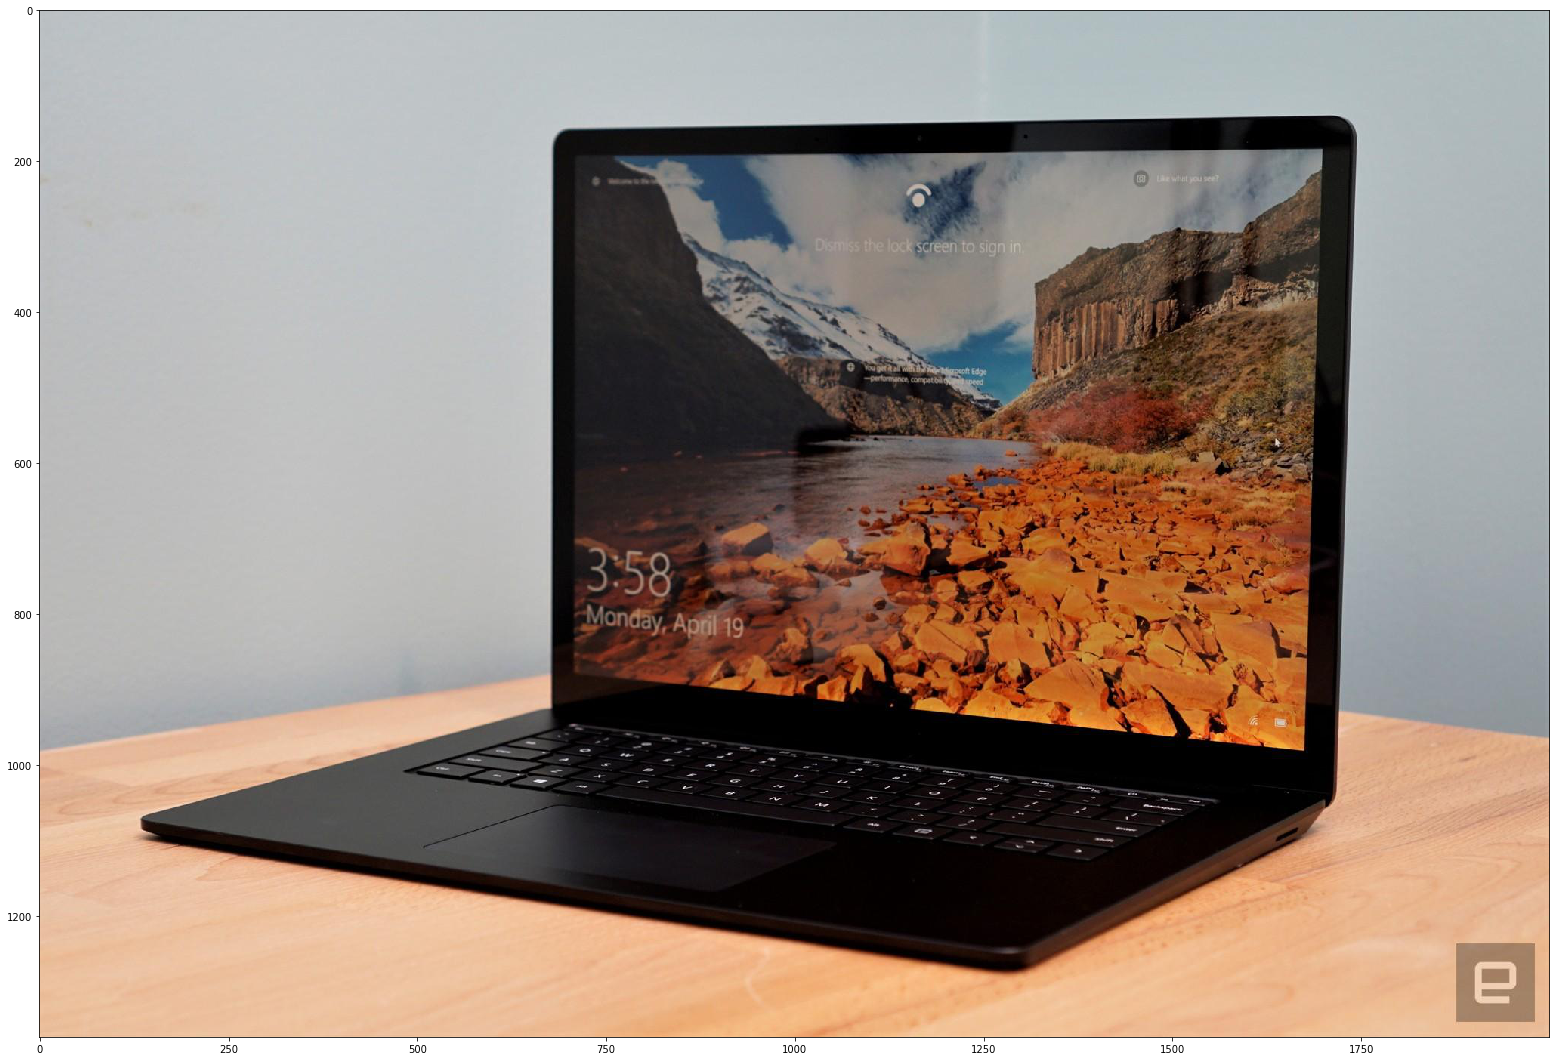


TOP 3 PREDICTED LABELS

LABEL 1: notebook, prob. 53.54%
LABEL 2: laptop, prob. 31.03%
LABEL 3: screen, prob. 1.71%


In [32]:
#############
## IMAGE 7 ##
#############

file_path= "image_class_7.jpg"              # image path

label_predictor(file_path)                  # image classification